# <span style="color:blue"> bbml.ensemble - BijanClassifier - version 0.0.1 </span>
## <span style="color:GREEN">DT/RF/GB/LR with Cost Matrix </span>

### <span style="color:RED">INSTALLING REQUIRED TOOLS</span>

In [1]:
from bbml.ensemble import BijanClassifier

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### <span style="color:RED">Generating a binary data set</span>

In [2]:
# Step 1: Generate a binary dataset
X, y = make_classification(n_samples=5000, n_features=20, n_informative=5, n_redundant=15, n_clusters_per_class=1, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:RED">Defining cost matrix and type of classification model</span>

In [3]:
# Step 3: Define the cost matrix and basic model
# here, We assume that a Type I error incurs a cost of 20 units, while a Type II error incurs a cost of 80 units.
CM = np.array([[0, 1000], [20, 0]])

# the based model can be decision tree (DT) or random forest (RF), or gradient boosting (GB) or logistic regression (LR)
BM = "DT"

### <span style="color:RED">Fitting a BijanClassifier on the training set and making prediction on test set</span>

In [4]:
# Step 4: Fit a BijanClassifier on the training set
clf = BijanClassifier(model_type='DT', cost_matrix=CM, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the classifier on the testing set
y_pred = clf.predict(X_test)

### <span style="color:RED">All outputs of BijanClassifier</span>

In [5]:
# Calculate accuracy
accuracy = clf.accuracy(y_test, y_pred)
print(accuracy)

0.537


In [6]:
# Calculate the associated cost with error types
cost = clf.cost(y_test, y_pred)
print(cost)

10240.0


In [7]:
# The new decision threshold for binary classification problem 

clf.best_threshold_()

0.9126172173485726

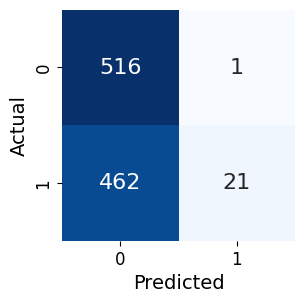

In [8]:
# Confusion Matrix

Conf_M = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(Conf_M, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

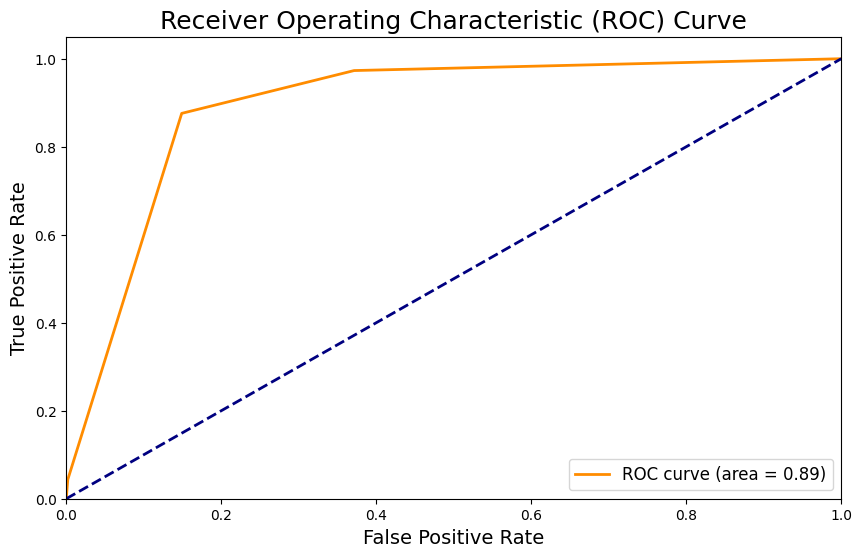

In [9]:
# Predict probabilities for the test set
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.show()